# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [98]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [7]:
## The subfiles are loaded into their seprate dataframes
df_test = pd.read_csv("task_1/mmlu_data/test.csv", sep=',')
df_x = pd.read_csv("task_1/lm_scores/lm_X.csv", sep=',')
df_y = pd.read_csv("task_1/lm_scores/lm_Y.csv", sep=',')
df_z = pd.read_csv("task_1/lm_scores/lm_Z.csv", sep=',')

##The dataframes' size is printed.
print(f"The respective lengths of the test, X, Y and Z data frame are :{df_test.shape[0]}, {df_x.shape[0]}, {df_y.shape[0]} and {df_z.shape[0]}.")

The respective lengths of the test, X, Y and Z data frame are :14042, 13882, 13978 and 13923.


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [9]:
# A

##pd.set_option('display.max_rows', None) added in order to display the full value counts to obtain all answer formats, disabled afterwards to /
##ensure ease of readability of the jupyter notebook. 
pd.reset_option('display.max_rows')

print("Value counts of df_x:")
print(df_x['result'].value_counts())
print("---------------------------")##added for ease of readability 

print("Value counts of df_y:")
print(df_y['result'].value_counts())
print("---------------------------")

print("Value counts of df_z:")
print(df_z['result'].value_counts())
print("---------------------------")

Value counts of df_x:
result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson wh

# B
The results of the print operation executed in 1.2.A reveals that while most of the dataframes display one of four possible letters in their result column (A, B, C or D), a number of unexpected data formats may be observed.

The first - and visibly most common one - is the addition of "Answer :" before the letter. Another very common unexpected answer format is the "reasoning, so the answer is ...". All three data set additionally display a number of rows with results along the lines of "Not wrong, wrong, so the answer is ...". Finally a number of "nan", "not sure" and "none of the above" results permeate through all of the datasets. 
The unexpected answer formats may thus be grouped into 2 categories: those that display the letter answer along with some text and those that do not by displaying a "not sure" or "none of the above" answer. 


### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [12]:
# A
## Deep copies of the initial (or "dirty") dataframes for filtering
df_x_filtered = df_x.copy()
df_y_filtered = df_y.copy()
df_z_filtered = df_z.copy()

## Dataframe filtering by initially converting all results to strings then using a labda function to fiter out those with a length greater than 10
df_x_filtered['result'] = df_x_filtered['result'].astype(str)
df_x_filtered = df_x_filtered[df_x_filtered['result'].apply(lambda x: len(x) < 10)]

df_y_filtered['result'] = df_y_filtered['result'].astype(str)
df_y_filtered = df_y_filtered[df_y_filtered['result'].apply(lambda x : len(x)<10)]

df_z_filtered['result'] = df_z_filtered['result'].astype(str)
df_z_filtered = df_z_filtered[df_z_filtered['result'].apply(lambda x : len(x)<10)]

In [13]:
# B
def clean_answer(dirtyframe, pattern='Answer: '): ## Modification of all answers with a "Answer :" in front
    return dirtyframe.replace(pattern, '')
def clean_answer2(dirtyframe, pattern = ' '): ## Modification of all answers with unwanted spaces
    return dirtyframe.replace(pattern, '')

## df_x filtering using the above defined functions                     
df_x_filtered['result'] = df_x_filtered['result'].apply(clean_answer)
df_x_filtered['result'] = df_x_filtered['result'].apply(clean_answer2)
df_x_filtered = df_x_filtered[df_x_filtered['result'] != 'nan'] ## filters out all rows with nan from the final data frame
df_x_filtered = df_x_filtered[df_x_filtered['result'] != 'NotSure'] ## filters out all rows with NotSure from the final data frame

## df_y filtering using the above defined functions 
df_y_filtered['result'] = df_y_filtered['result'].apply(clean_answer)
df_y_filtered['result'] = df_y_filtered['result'].apply(clean_answer2)
df_y_filtered = df_y_filtered[df_y_filtered['result'] != 'nan']
df_y_filtered = df_y_filtered[df_y_filtered['result'] != 'NotSure']

## df_z filtering using the above defined functions 
df_z_filtered['result'] = df_z_filtered['result'].apply(clean_answer)
df_z_filtered['result'] = df_z_filtered['result'].apply(clean_answer2)
df_z_filtered = df_z_filtered[df_z_filtered['result'] != 'nan']
df_z_filtered = df_z_filtered[df_z_filtered['result'] != 'NotSure']

C. /Discuss:/

In [15]:
data_loss_x = df_x.shape[0] - df_x_filtered.shape[0]
print(f"The initial size of the df_x dataframe was {df_x.shape[0]} compared to a filtered size of {df_x_filtered.shape[0]}.This corresponds to a loss of {data_loss_x} rows of data.")

data_loss_y = df_y.shape[0] - df_y_filtered.shape[0]
print(f"The initial size of the df_y dataframe was {df_y.shape[0]} compared to a filtered size of {df_y_filtered.shape[0]}.This corresponds to a loss of {data_loss_y} rows of data.")

data_loss_z = df_z.shape[0] - df_z_filtered.shape[0]
print(f"The initial size of the df_z dataframe was {df_z.shape[0]} compared to a filtered size of {df_z_filtered.shape[0]}.This corresponds to a loss of {data_loss_z} rows of data.")

total_data_loss = data_loss_x + data_loss_y + data_loss_z
print(f"A total data loss of {total_data_loss} rows of data occured during filtering.")

The initial size of the df_x dataframe was 13882 compared to a filtered size of 13436.This corresponds to a loss of 446 rows of data.
The initial size of the df_y dataframe was 13978 compared to a filtered size of 13551.This corresponds to a loss of 427 rows of data.
The initial size of the df_z dataframe was 13923 compared to a filtered size of 12753.This corresponds to a loss of 1170 rows of data.
A total data loss of 2043 rows of data occured during filtering.


The total data loss of 2043 rows during filtering is significant and could very well change some of the results of the subsequent analyses that need to be performed. More importantly, this data loss is unequal amongst the three models as they failed different questions. Filtering them out could thus skew the final data regarding their accuracy. 

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [18]:
# A
complete_df_x = pd.merge(df_x_filtered, df_test, on='question_id')
complete_df_y = pd.merge(df_y_filtered, df_test, on='question_id')
complete_df_z = pd.merge(df_z_filtered, df_test, on='question_id')

In [19]:
# B
## The new 'correct' column is created as a boolean defined by the equality between the 'result' and 'answer' columns
complete_df_x['correct'] = complete_df_x['result'] == complete_df_x['answer']
complete_df_y['correct'] = complete_df_y['result'] == complete_df_y['answer']
complete_df_z['correct'] = complete_df_z['result'] == complete_df_z['answer']

### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [21]:
# A
## copies of the complete filtered dataframes obtained last question are performed for the new maniuplations
df_x_grouped = complete_df_x.copy()
df_y_grouped = complete_df_y.copy()
df_z_grouped = complete_df_z.copy()

## A groupby subject is initially applied and the size of each subject's question pool is computed. 
## It is then directly reconverted into the new dataframe copies defined above using .reset_index() for ease of manipulation
## The columns are renamed from the automatic 0 that was assigned to them
df_x_grouped = df_x_grouped.groupby('subject').size().reset_index()
df_x_grouped.rename(columns={'subject' : 'subject', 0:'count_x'}, inplace=True) 
df_y_grouped = df_y_grouped.groupby('subject').size().reset_index()
df_y_grouped.rename(columns={'subject' : 'subject', 0:'count_y'}, inplace = True)
df_z_grouped = df_z_grouped.groupby('subject').size().reset_index()
df_z_grouped.rename(columns={'subject' : 'subject', 0:'count_z'}, inplace=True)

## A large grouped dataframe is created cobining the three created above
df_grouped = pd.merge(df_x_grouped, df_y_grouped, on='subject')
df_grouped = pd.merge(df_grouped, df_z_grouped, on='subject')

## Differences from the point of view of each dataframe are computed and added to the dataframe. The "POV" model is the first one mentionned in the column name
## Absolute values are computed from the getgo to simplify subsequent filtering 
df_grouped['difference_xy'] = np.abs((df_grouped['count_y']-df_grouped['count_x'])/df_grouped['count_x'])
df_grouped['difference_xz'] = np.abs((df_grouped['count_z']-df_grouped['count_x'])/df_grouped['count_x'])
df_grouped['difference_yx'] = np.abs((df_grouped['count_x']-df_grouped['count_y'])/df_grouped['count_y'])
df_grouped['difference_yz'] = np.abs((df_grouped['count_z']-df_grouped['count_y'])/df_grouped['count_y'])
df_grouped['difference_zx'] = np.abs((df_grouped['count_x']-df_grouped['count_z'])/df_grouped['count_z'])
df_grouped['difference_zy'] = np.abs((df_grouped['count_y']-df_grouped['count_z'])/df_grouped['count_z'])

## Any difference <0.1 in a given subject for a topic from the point of view of one of the three datamodels results in the row being dropped
df_grouped_filtered = df_grouped.drop(df_grouped[(df_grouped['difference_xy'] < 0.1) & (df_grouped['difference_xz'] < 0.1) & 
        (df_grouped['difference_yx'] < 0.1) & (df_grouped['difference_yz'] < 0.1) & 
        (df_grouped['difference_zx'] < 0.1) & (df_grouped['difference_zy'] < 0.1)].index)
print(df_grouped_filtered['subject'])

6            college chemistry
7     college computer science
11           computer security
16                formal logic
22       high school geography
36           logical fallacies
40            medical genetics
42              moral disputes
43             moral scenarios
Name: subject, dtype: object


# B
I think the best thing that could be done for this would be to assign weighted averages to all models if they experience there exists a difference of more than 10% between any two of them in questions for a given subject. This could be done by assigning weighted averages to the percentage of correct answers of a given model. For instance, looking at the high school geography subjet, it is very obvious that model z has a much lower response rate compared to models x and y. The individual answers of model i can thus be scaled to that of models j and k by applying the formula w_i = (count_j+count_k)/total_count where total_count is the sum of all questions answered by the three language models on a given subject.  
The code below computes the weights to be applied to each model for the concerned subjects.

In [23]:
df_grouped_filtered['weight_x'] = (df_grouped_filtered['count_y'] + df_grouped_filtered['count_z'])/(df_grouped_filtered['count_x'] + df_grouped_filtered['count_y'] + df_grouped_filtered['count_z'])
df_grouped_filtered['weight_y'] = (df_grouped_filtered['count_x'] + df_grouped_filtered['count_z'])/(df_grouped_filtered['count_x'] + df_grouped_filtered['count_y'] + df_grouped_filtered['count_z'])
df_grouped_filtered['weight_z'] = (df_grouped_filtered['count_y'] + df_grouped_filtered['count_x'])/(df_grouped_filtered['count_x'] + df_grouped_filtered['count_y'] + df_grouped_filtered['count_z'])
df_grouped_filtered

###c de la merde, on prend le minimal et on le "upscale" à celui de la moyenne des deux autres en faisant tot/totdesdeuxautres

,subject,count_x,count_y,count_z,difference_xy,difference_xz,difference_yx,difference_yz,difference_zx,difference_zy,weight_x,weight_y,weight_z
6,college chemistry,96,98,84,0.020833,0.125000,0.020408,0.142857,0.142857,0.166667,0.654676,0.647482,0.697842
7,college computer science,97,98,84,0.010309,0.134021,0.010204,0.142857,0.154762,0.166667,0.652330,0.648746,0.698925
11,computer security,95,98,87,0.031579,0.084211,0.030612,0.112245,0.091954,0.126437,0.660714,0.650000,0.689286
16,formal logic,109,123,113,0.128440,0.036697,0.113821,0.081301,0.035398,0.088496,0.684058,0.643478,0.672464
22,high school geography,195,193,176,0.010256,0.097436,0.010363,0.088083,0.107955,0.096591,0.654255,0.657801,0.687943
36,logical fallacies,154,136,147,0.116883,0.045455,0.132353,0.080882,0.047619,0.074830,0.647597,0.688787,0.663616
40,medical genetics,97,98,89,0.010309,0.082474,0.010204,0.091837,0.089888,0.101124,0.658451,0.654930,0.686620
42,moral disputes,329,304,250,0.075988,0.240122,0.082237,0.177632,0.316000,0.216000,0.627407,0.655719,0.716874
43,moral scenarios,737,865,774,0.173677,0.050204,0.147977,0.105202,0.047804,0.117571,0.689815,0.635943,0.674242


In [24]:
# C

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [26]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [28]:
# A

## New dataframes are created for each LLM
## On the mmlu dataset
df_mmlu_X = df_mmlu[df_mmlu['model_name'] == 'X']
df_mmlu_Y = df_mmlu[df_mmlu['model_name'] == 'Y']
df_mmlu_Z = df_mmlu[df_mmlu['model_name'] == 'Z']
## On the 'other' dataset
df_other_X = df_other[df_other['model_name'] == 'X']
df_other_Y = df_other[df_other['model_name'] == 'Y']
df_other_Z = df_other[df_other['model_name'] == 'Z']

## The mean accuracy is computed using .mean()
## On the mmlu dataset
mean_mmlu_accuracy_X = df_mmlu_X['correct'].mean()
mean_mmlu_accuracy_Y = df_mmlu_Y['correct'].mean()
mean_mmlu_accuracy_Z = df_mmlu_Z['correct'].mean()
## On the 'other' dataset
mean_other_accuracy_X = df_other_X['correct'].mean()
mean_other_accuracy_Y = df_other_Y['correct'].mean()
mean_other_accuracy_Z = df_other_Z['correct'].mean()

## The standard error is computed using error = s/sqrt(size) formula
## On the mmlu dataset
error_mmlu_X = df_mmlu_X['correct'].std()/np.sqrt(len(df_mmlu_X))
error_mmlu_Y = df_mmlu_Y['correct'].std()/np.sqrt(len(df_mmlu_Y))
error_mmlu_Z = df_mmlu_Z['correct'].std()/np.sqrt(len(df_mmlu_Z))
## On the 'other dataset
error_other_X = df_other_X['correct'].std()/np.sqrt(len(df_other_X))
error_other_Y = df_other_Y['correct'].std()/np.sqrt(len(df_other_Y))
error_other_Z = df_other_Z['correct'].std()/np.sqrt(len(df_other_Z))

print(f"The mean accuracy and standard error of the X model on MMLU are respectively {mean_mmlu_accuracy_X} and {error_mmlu_X}.")
print(f"The mean accuracy and standard error of the X model on 'other' are respectively {mean_other_accuracy_X} and {error_other_X}.")

print(f"The mean accuracy and standard error of the Y model on MMLU are respectively {mean_mmlu_accuracy_Y} and {error_mmlu_Y}.")
print(f"The mean accuracy and standard error of the Y model on 'other' are respectively {mean_other_accuracy_Y} and {error_other_Y}.")

print(f"The mean accuracy and standard error of the Z model on MMLU are respectively {mean_mmlu_accuracy_Z} and {error_mmlu_Z}.")
print(f"The mean accuracy and standard error of the Z model on 'other' are respectively {mean_other_accuracy_Z} and {error_other_Z}.")

The mean accuracy and standard error of the X model on MMLU are respectively 0.7435875512995896 and 0.004037713456574967.
The mean accuracy and standard error of the X model on 'other' are respectively 0.787975525405693 and 0.006667622050812724.
The mean accuracy and standard error of the Y model on MMLU are respectively 0.7615424076607387 and 0.003940510695325721.
The mean accuracy and standard error of the Y model on 'other' are respectively 0.7209364192604416 and 0.007316808287338864.
The mean accuracy and standard error of the Z model on MMLU are respectively 0.6559507523939808 and 0.004392844300172015.
The mean accuracy and standard error of the Z model on 'other' are respectively 0.6717212024474595 and 0.007660154999876901.


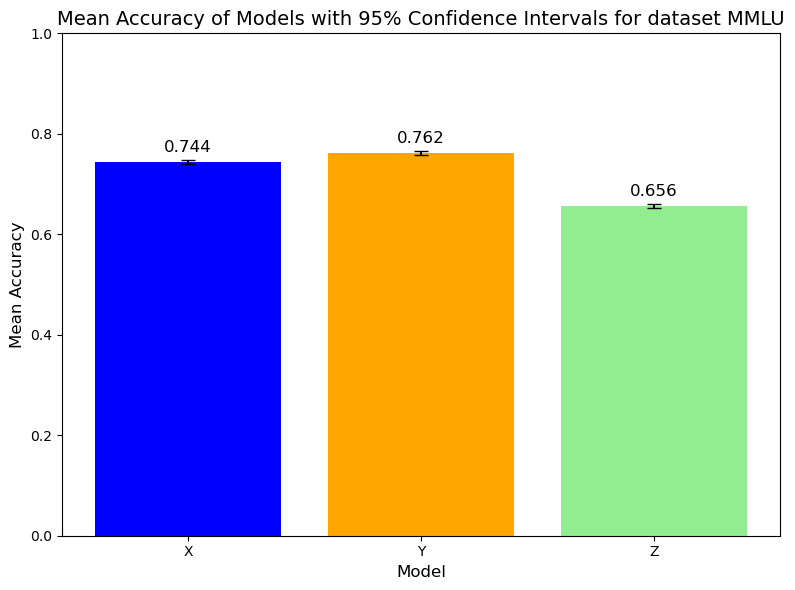

In [29]:
# B

##In each case, a dataframe is created with the data above for each dataset and plt.bar used for the bar graphs

## mmlu
df_mmlu_plot = pd.DataFrame({'Model':['X','Y','Z'],
                          'Accuracy' : [mean_mmlu_accuracy_X, mean_mmlu_accuracy_Y, mean_mmlu_accuracy_Z],
                          'error' : [error_mmlu_X, error_mmlu_Y, error_mmlu_Z]})

plt.figure(figsize=(8, 6))
plt.bar(df_mmlu_plot['Model'], df_mmlu_plot['Accuracy'], yerr=df_mmlu_plot['error'], capsize=5, color=['blue', 'orange', 'lightgreen'])

plt.title('Mean Accuracy of Models with 95% Confidence Intervals for dataset MMLU', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.ylim(0, 1)

for i in range(len(df_mmlu_plot)):
    plt.text(i, df_mmlu_plot['Accuracy'][i] + 0.02, f'{df_mmlu_plot['Accuracy'][i]:.3f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

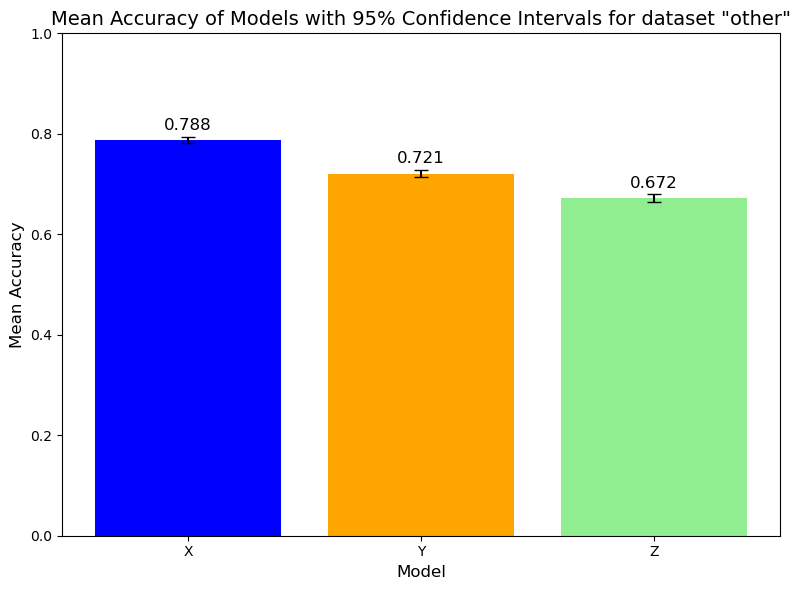

In [30]:
## other

df_other_plot = pd.DataFrame({'Model':['X','Y','Z'],
                          'Accuracy' : [mean_other_accuracy_X, mean_other_accuracy_Y, mean_other_accuracy_Z],
                          'error' : [error_other_X, error_other_Y, error_other_Z]})

plt.figure(figsize=(8, 6))
plt.bar(df_other_plot['Model'], df_other_plot['Accuracy'], yerr=df_other_plot['error'], capsize=5, color=['blue', 'orange', 'lightgreen']) 

plt.title('Mean Accuracy of Models with 95% Confidence Intervals for dataset "other"', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.ylim(0, 1)

for i in range(len(df_other_plot)):
    plt.text(i, df_other_plot['Accuracy'][i] + 0.02, f'{df_other_plot['Accuracy'][i]:.3f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

C. /Discuss:/

The X model is the best on the 'other' dataset while the Y model is the best on the mmlu dataset. For both, the Z model has the worst performance. It is interesting to note that X and Y see their mean accuracies change by around the same amount (0.04) between both datasets. 

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

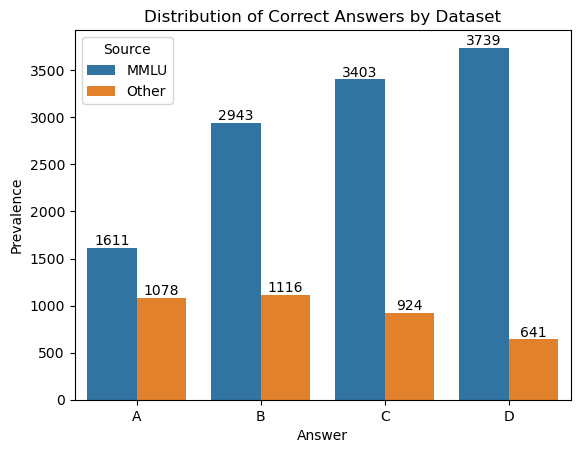

In [33]:
# A

## Keeping the first hint in mind, we may simply analyse each dataset using the one of the model centric dataframes created in 2.1.A 

## We first obtain the counts of each answer type for both datasets in a list for easier subsequent dataframe definition
mmlu_distribution = []
other_distribution = []
for answer in ['A', 'B', 'C', 'D']:
    mmlu_distribution.append(df_mmlu_X[df_mmlu_X['answer'] == answer]['answer'].value_counts().get(answer, 0))
    other_distribution.append(df_other_X[df_other_X['answer'] == answer]['answer'].value_counts().get(answer, 0))
## df_mmlu_X is taken in order to take into account the fact that the csv source files list the answers given by each of the three models. 
## Conducting the above definition over all the df_mmlu dataframe would thus artificially triple the prevalence of each of the 4 answer types.
## This method is valid as the LLM's answer the same questions 

## New data frames are created
df_mmlu_distribution = pd.DataFrame({'Answer' : ['A', 'B', 'C', 'D'],
                                     'Number' : mmlu_distribution,
                                     'Source' : ['MMLU']*4}) 
df_other_distribution = pd.DataFrame({'Answer' : ['A', 'B', 'C', 'D'],
                                     'Number' : other_distribution,
                                     'Source' : ['Other']*4})
df_tot_distribution = pd.concat([df_mmlu_distribution, df_other_distribution], ignore_index=True)

## The plot can then finally be created
dist_plot = sns.barplot(x='Answer', y='Number', hue='Source', data=df_tot_distribution)
plt.xlabel('Answer')
plt.ylabel('Prevalence')
plt.title('Distribution of Correct Answers by Dataset')
dist_plot.bar_label(dist_plot.containers[0], fontsize=10)
dist_plot.bar_label(dist_plot.containers[1], fontsize=10)
plt.legend(title='Source')

In [34]:
# B

## A contingency table is first created in order to run the chi^2 independence test using the results of #A
## chi2_contingency imported in the first cell with all the other imports

alpha = 0.05

## An array is defined in order to use the chi2_contingency function
chi2_test_array = np.array([mmlu_distribution, other_distribution])

print("The null hypothesis H0 states that answer distribution is independent from the dataset.")
print("The alternative hypothesis H1 states that answer distribution is dataset dependent.")

res = chi2_contingency(chi2_test_array)
print(res)

if res.pvalue<alpha :
    print(f"pvalue = {res.pvalue} < alpha = {alpha} : the null hypothesis is rejected, answer distribution is not dataset independent")
if res.pvalue>alpha :
    print(f"pvalue = {res.pvalue} > alpha = {alpha} : the null hypothesis is valid, answer distribution is dataset independent")

The null hypothesis H0 states that answer distribution is independent from the dataset.
The alternative hypothesis H1 states that answer distribution is dataset dependent.
Chi2ContingencyResult(statistic=629.3958675644751, pvalue=4.270849602795191e-136, dof=3, expected_freq=array([[2034.97534778, 3071.76085409, 3274.5772889 , 3314.68650922],
       [ 654.02465222,  987.23914591, 1052.4227111 , 1065.31349078]]))
pvalue = 4.270849602795191e-136 < alpha = 0.05 : the null hypothesis is rejected, answer distribution is not dataset independent


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [36]:
# A

## A mean_accuracy function is defined to simplify the computation using the groupby function to create new dataframes on which the mean is immediately computed
def mean_accuracy(df, model, dataset):
    mean_accuracy = df.groupby('answer')['correct'].mean()
    for answer, mean_accuracy in mean_accuracy.items():
        print(f"The mean accuracy for model {model} on the {dataset} dataset for option {answer} is {mean_accuracy}")
        
mean_accuracy(df_mmlu_X, 'X', 'mmlu')
mean_accuracy(df_other_X, 'X', '"other"')

The mean accuracy for model X on the mmlu dataset for option A is 0.9726877715704532
The mean accuracy for model X on the mmlu dataset for option B is 0.799184505606524
The mean accuracy for model X on the mmlu dataset for option C is 0.7079047898912724
The mean accuracy for model X on the mmlu dataset for option D is 0.6335918694838192
The mean accuracy for model X on the "other" dataset for option A is 0.974025974025974
The mean accuracy for model X on the "other" dataset for option B is 0.8064516129032258
The mean accuracy for model X on the "other" dataset for option C is 0.6764069264069265
The mean accuracy for model X on the "other" dataset for option D is 0.6037441497659907


In [37]:
# B

## alpha is computed
CI = 0.95
alpha = 1 - CI
 
## A dataframe per dataset is defined to describe X's performance when the correct answer is 1
## They are then converted to arrays for use in the scipy ttest_ind function 
df_mmlu_X_A = df_mmlu_X[df_mmlu_X['answer']=='A']
df_other_X_A = df_other_X[df_other_X['answer']=='A']
array_mmlu_X_A = df_mmlu_X_A['correct'].values
array_other_X_A = df_other_X_A['correct'].values

## The hypotheses are stated
print("The null hypothesis H0 states that model performance is independent from the dataset when the answer is A.")
print("The alternative hypothesis H1 states that model performance is dependent on the dataset when the answer is A.")

## The test is performed and the p value extracted for conclusion
res2 = ttest_ind(array_mmlu_X_A, array_other_X_A, equal_var=False)
if res2.pvalue<alpha :
    print(f"pvalue = {res2.pvalue} < alpha = {alpha} : the null hypothesis is rejected, performance is dependent on the dataset for answer A")
if res2.pvalue>alpha :
    print(f"pvalue = {res2.pvalue} > alpha = {alpha} : the null hypothesis is valid, performance is independent of the dataset for answer A")

The null hypothesis H0 states that model performance is independent from the dataset when the answer is A.
The alternative hypothesis H1 states that model performance is dependent on the dataset when the answer is A.
pvalue = 0.8324287723934077 > alpha = 0.050000000000000044 : the null hypothesis is valid, performance is independent of the dataset for answer A


The null hypothesis being valid here implies that there is no significant difference between model X's accuracy for questions whose correct answer is A on either model. Its performance would thus be model independent in this case.

In [39]:
# C

## The alpha value is the same as defined in 2.3B

## In order to model the 'C or D' performance, new dataframes as defined as in 2.3B and concated
## They are then converted into arrays as in 2.3B
df_mmlu_X_C = df_mmlu_X[df_mmlu_X['answer']=='C']
df_other_X_C = df_other_X[df_other_X['answer']=='C']
df_mmlu_X_D = df_mmlu_X[df_mmlu_X['answer']=='D']
df_other_X_D = df_other_X[df_other_X['answer']=='D']

df_mmlu_X_CD = pd.concat([df_mmlu_X_C, df_mmlu_X_D], axis = 0)

## The concacted datafram is then turned into an array
array_mmlu_X_CD = df_mmlu_X_CD['correct'].values

## The hypotheses are stated
print("The null hypothesis H0 states that model X's performance is independent of the correct answer")
print("The alternative hypothesis H1 states that model X's performance is dependent on the correct answer")

## Independence test for mmlu
res3 = ttest_ind(array_mmlu_X_A, array_mmlu_X_CD, equal_var=False)
if res3.pvalue<alpha :
    print(f"pvalue = {res3.pvalue} < alpha = {alpha} : the null hypothesis is rejected, the performance is dependent on the correct answer on MMLU")
if res3.pvalue>alpha :
    print(f"pvalue = {res3.pvalue} > alpha = {alpha} : the null hypothesis is valid, the performance is not dependent on the correct answer on MMLU")

## Independence test for "other"
df_other_X_CD = pd.concat([df_other_X_C, df_other_X_D], axis = 0)
array_other_X_CD = df_other_X_CD['correct'].values
res4 = ttest_ind(array_other_X_A, array_other_X_CD, equal_var=False)
if res4.pvalue<alpha :
    print(f"pvalue = {res4.pvalue} < alpha = {alpha} : the null hypothesis is rejected, the performance is dependent on the correct answer on other")
if res4.pvalue>alpha :
    print(f"pvalue = {res4.pvalue} > alpha = {alpha} : the null hypothesis is valid, the performance is not dependent on the correct answer on other")



The null hypothesis H0 states that model X's performance is independent of the correct answer
The alternative hypothesis H1 states that model X's performance is dependent on the correct answer
pvalue = 0.0 < alpha = 0.050000000000000044 : the null hypothesis is rejected, the performance is dependent on the correct answer on MMLU
pvalue = 1.1880049447651487e-121 < alpha = 0.050000000000000044 : the null hypothesis is rejected, the performance is dependent on the correct answer on other


The null hypotheses - that model X's performance is independent of the correct answer - has been rejected on both the mmlu and 'other' datasets. 

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [42]:
# A

## The previously defined mean_accuracy function is reused

mean_accuracy(df_mmlu_X, 'X', 'mmlu')
mean_accuracy(df_other_X, 'X', '"other"')

mean_accuracy(df_mmlu_Y, 'Y', 'mmlu')
mean_accuracy(df_mmlu_Y, 'Y', '"other"')

mean_accuracy(df_mmlu_Z, 'Z', 'mmlu')
mean_accuracy(df_mmlu_Z, 'Z', '"other"')


The mean accuracy for model X on the mmlu dataset for option A is 0.9726877715704532
The mean accuracy for model X on the mmlu dataset for option B is 0.799184505606524
The mean accuracy for model X on the mmlu dataset for option C is 0.7079047898912724
The mean accuracy for model X on the mmlu dataset for option D is 0.6335918694838192
The mean accuracy for model X on the "other" dataset for option A is 0.974025974025974
The mean accuracy for model X on the "other" dataset for option B is 0.8064516129032258
The mean accuracy for model X on the "other" dataset for option C is 0.6764069264069265
The mean accuracy for model X on the "other" dataset for option D is 0.6037441497659907
The mean accuracy for model Y on the mmlu dataset for option A is 0.6238361266294227
The mean accuracy for model Y on the mmlu dataset for option B is 0.6880733944954128
The mean accuracy for model Y on the mmlu dataset for option C is 0.7334704672347928
The mean accuracy for model Y on the mmlu dataset for o

B. /Discuss:/

The results show that while LLM X is the best at answering questions whose correct answer is A, LLM Y is best for questions whose answer is D. meanwhile, LLM Z seems to be pretty balanced acrossed all question types. One could hypothesize that this is a result of bias amongst the different questions that the LLM is fed. 

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

/Discuss:/

As previously mentionned, one of the possible explanations for LLM's X and Y's differing accuracies per answer could be an acquired bias as they go through the question list. Permutating the correct answers around could eliminate this positional bias - assuming it is the explanation for the behaviour described in the previous questions. 

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

M corresponds to the number of reshuffles. Question 2.5's prompt states that Ms. Sakota "randomly permutes the position of the correct answer", implying that she only does so once. As such, we can set M to 1.

In [48]:
## df_mmlu is taken as defined in task 2's prompt 
df_mmlu_shuffled = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv') 

df_mmlu_shuffled_X = df_mmlu_shuffled[df_mmlu_shuffled['model_name'] == 'X']
df_mmlu_shuffled_Y = df_mmlu_shuffled[df_mmlu_shuffled['model_name'] == 'Y']
df_mmlu_shuffled_Z = df_mmlu_shuffled[df_mmlu_shuffled['model_name'] == 'Z']

array_mmlu_shuffled_X = df_mmlu_shuffled_X['correct'].values
array_mmlu_shuffled_Y = df_mmlu_shuffled_Y['correct'].values
array_mmlu_shuffled_Z = df_mmlu_shuffled_Z['correct'].values

array_mmlu_X = df_mmlu_X['correct'].values
array_mmlu_Y = df_mmlu_Y['correct'].values
array_mmlu_Z = df_mmlu_Z['correct'].values

def test_retest_metric(array1, array2, LLM_name):
    trm = 1/len(array1)*np.sum(array1*array2)
    print(f"The test retest metric for LLM {LLM_name} is {trm}.")

test_retest_metric(array_mmlu_shuffled_X, array_mmlu_X, 'X')
test_retest_metric(array_mmlu_shuffled_Y, array_mmlu_Y, 'Y')
test_retest_metric(array_mmlu_shuffled_Z, array_mmlu_Z, 'Z')

The test retest metric for LLM X is 0.5884062927496579.
The test retest metric for LLM Y is 0.5716484268125855.
The test retest metric for LLM Z is 0.44160396716826267.


### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [50]:
# A

## The distribution of answers given can be computed by cretaing new dataframes from the large ones and getting their lengths

def answer_distribution(df, model, dataset):
    for possibility in ['A', 'B', 'C', 'D']:
        df_new = df[df['result'] == possibility]
        distribution = len(df_new)
        print(f"Model {model} answers {possibility} {distribution} times on the {dataset} dataset.")

answer_distribution(df_mmlu_X, 'X', 'mmlu')
answer_distribution(df_other_X, 'X', '"other"')

answer_distribution(df_mmlu_Y, 'Y', 'mmlu')
answer_distribution(df_other_Y, 'Y', '"other"')

answer_distribution(df_mmlu_Z, 'Z', 'mmlu')
answer_distribution(df_other_Z, 'Z', '"other"')

##do we need a graph here?

Model X answers A 4259 times on the mmlu dataset.
Model X answers B 2659 times on the mmlu dataset.
Model X answers C 2409 times on the mmlu dataset.
Model X answers D 2369 times on the mmlu dataset.
Model X answers A 1766 times on the "other" dataset.
Model X answers B 981 times on the "other" dataset.
Model X answers C 625 times on the "other" dataset.
Model X answers D 387 times on the "other" dataset.
Model Y answers A 1072 times on the mmlu dataset.
Model Y answers B 2256 times on the mmlu dataset.
Model Y answers C 3015 times on the mmlu dataset.
Model Y answers D 5353 times on the mmlu dataset.
Model Y answers A 692 times on the "other" dataset.
Model Y answers B 802 times on the "other" dataset.
Model Y answers C 909 times on the "other" dataset.
Model Y answers D 1356 times on the "other" dataset.
Model Z answers A 2176 times on the mmlu dataset.
Model Z answers B 2885 times on the mmlu dataset.
Model Z answers C 3237 times on the mmlu dataset.
Model Z answers D 3398 times on 

In [51]:
## Mean accuracy conditioned on the answer
## This question is the "other way around" of question 2.3. The mean_accuracy function can thus be reused with a simple tweak.
def mean_accuracy(df, model, dataset):
    mean_accuracy = df.groupby('result')['correct'].mean()
    for result, mean_accuracy in mean_accuracy.items():
        print(f"The mean accuracy for model {model} on the {dataset} dataset for answers {result} is {mean_accuracy}")

mean_accuracy(df_mmlu_X, 'X', 'mmlu')
mean_accuracy(df_other_X, 'X', '"other"')

mean_accuracy(df_mmlu_Y, 'Y', 'mmlu')
mean_accuracy(df_other_Y, 'Y', '"other"')

mean_accuracy(df_mmlu_Z, 'Z', 'mmlu')
mean_accuracy(df_other_Z, 'Z', '"other"')


The mean accuracy for model X on the mmlu dataset for answers A is 0.36792674336698755
The mean accuracy for model X on the mmlu dataset for answers B is 0.884543061301241
The mean accuracy for model X on the mmlu dataset for answers C is 1.0
The mean accuracy for model X on the mmlu dataset for answers D is 1.0
The mean accuracy for model X on the "other" dataset for answers A is 0.594563986409966
The mean accuracy for model X on the "other" dataset for answers B is 0.9174311926605505
The mean accuracy for model X on the "other" dataset for answers C is 1.0
The mean accuracy for model X on the "other" dataset for answers D is 1.0
The mean accuracy for model Y on the mmlu dataset for answers A is 0.9375
The mean accuracy for model Y on the mmlu dataset for answers B is 0.8976063829787234
The mean accuracy for model Y on the mmlu dataset for answers C is 0.8278606965174129
The mean accuracy for model Y on the mmlu dataset for answers D is 0.6316084438632542
The mean accuracy for model Y

B. /Discuss:/

The X and Y models see their accuracy decrease the more they answer a given question. Model X for instance has an accuracy of 1.0 when answering C and D (done 2409 and 2369 times respectively) which decreases to 0.368 for answer A which it answers 4259 times. This behaviour proves that models X and Y are biased towards answering questions with an A and D respectively. 

Model Z also demonstrates similar yet markedly less severe behaviour that is "inverted" from a dataset to another: going from A to D, its accuracy increases from 0.476 to 0.727 on the mmlu dataset yet decreases from 0.71 to 0.55 in the "other" dataset (it is important to note that its accuracy on "other" reaches its peak for B.

We may now ask ourselves why. 

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [54]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [56]:
# A

In [57]:
# B

In [58]:
# C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [60]:
# A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [63]:
# A

B. /Dicsuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. 

2. 

3. 

4. 